In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import math


<AxesSubplot:>

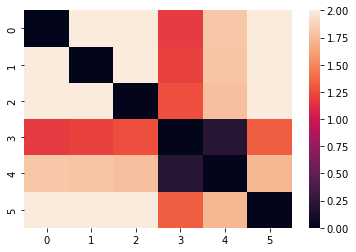

In [9]:
data3 = [[0.000, 2.000, 1.998, 1.181, 1.812, 1.993],
        [2.000, 0.000, 1.999, 1.216, 1.795, 1.996],
        [1.998, 1.999, 0.000, 1.258, 1.772, 1.998],
        [1.181, 1.216, 1.258, 0.000, 0.208, 1.326],
        [1.812, 1.795, 1.772, 0.208, 0.000, 1.732],
        [1.993, 1.996, 1.998, 1.326, 1.732, 0.000]]
data3 = np.array(data3)
sns.heatmap(data3)

In [18]:
dist_matrix3 = cdist(data3, data3, metric='euclidean')

In [19]:
dist_matrix3

array([[0.        , 2.82869652, 2.82693527, 2.63997784, 2.77031388,
        2.8233914 ],
       [2.82869652, 0.        , 2.82741985, 2.67294276, 2.75983387,
        2.825624  ],
       [2.82693527, 2.82741985, 0.        , 2.70986826, 2.74398178,
        2.82670586],
       [2.63997784, 2.67294276, 2.70986826, 0.        , 1.11756968,
        2.76667165],
       [2.77031388, 2.75983387, 2.74398178, 1.11756968, 0.        ,
        2.71547602],
       [2.8233914 , 2.825624  , 2.82670586, 2.76667165, 2.71547602,
        0.        ]])

In [11]:
def sim(dist):
    return math.exp(-(dist)**2/2)

In [12]:
def cond_prob(j,i,dist_mat):
    # i and j are shapes of the matrix, in python indexing starts from 0 so we need to subtract 1
    i = i-1
    j = j-1
    
    # We are calculating the numerator for the conditional probability
    num = sim(dist_mat[i,j])
    
    # We are calculating the denominator for the conditional probability
    if i ==j:
        return 0 # Refer the formula
    else:
        den = 0
        for col in range(np.shape(dist_mat)[1]): # We are iterating over the columns
            if col != i:
                den += sim(dist_mat[i,col])
 
        return num / den # Returning the conditional probability



In [13]:
def joint_prob(dist_matrix,data):
    # Our conditional matrix will be of same shape as of the distance matrix
    cond_matrix = np.zeros(np.shape(dist_matrix))
 
    row, colm = np.shape(data)
    m,n = np.shape(dist_matrix)
 
    # We are iterating over the rows and columns to find out the conditional probability for each pair
    for i in range(1,m+1):
        for j in range(1,n+1):
            cond1 = cond_prob(j,i,dist_matrix)
            cond2 = cond_prob(i,j,dist_matrix) 
            # Refer the formula
            temp = (cond1 + cond2)/(2*row*colm)
            # Storing the value in the conditional matrix
            cond_matrix[i-1,j-1] = temp
 	
    return cond_matrix


In [16]:
joint_prob_data3 = joint_prob(dist_matrix3, data3)
print('The high dimensional Matrix is: ')
print(np.round(data3, 3))
print(data3.shape)
print('\nThe joint probability of high dimensional matrix is: \n\n', np.round(joint_prob_data3, 4))


The high dimensional Matrix is: 
[[0.    2.    1.998 1.181 1.812 1.993]
 [2.    0.    1.999 1.216 1.795 1.996]
 [1.998 1.999 0.    1.258 1.772 1.998]
 [1.181 1.216 1.258 0.    0.208 1.326]
 [1.812 1.795 1.772 0.208 0.    1.732]
 [1.993 1.996 1.998 1.326 1.732 0.   ]]
(6, 6)

The joint probability of high dimensional matrix is: 

 [[0.     0.0048 0.0048 0.0046 0.0033 0.0049]
 [0.0048 0.     0.0049 0.0043 0.0034 0.0049]
 [0.0048 0.0049 0.     0.004  0.0036 0.005 ]
 [0.0046 0.0043 0.004  0.     0.0234 0.0034]
 [0.0033 0.0034 0.0036 0.0234 0.     0.004 ]
 [0.0049 0.0049 0.005  0.0034 0.004  0.    ]]


In [17]:
#Calculation of joint probability for low dimension matrix
#############################
#Code to generate the random number matrix


np.random.seed(0)


Y = np.random.rand(6,2)
 
print('The high dimensional Matrix is: ')
print(np.round(data3,3))
print(data3.shape)
 
print('\n\nThe low dimensional Matrix is: ')
print(np.round(Y,5))
print(Y.shape)
 


The high dimensional Matrix is: 
[[0.    2.    1.998 1.181 1.812 1.993]
 [2.    0.    1.999 1.216 1.795 1.996]
 [1.998 1.999 0.    1.258 1.772 1.998]
 [1.181 1.216 1.258 0.    0.208 1.326]
 [1.812 1.795 1.772 0.208 0.    1.732]
 [1.993 1.996 1.998 1.326 1.732 0.   ]]
(6, 6)


The low dimensional Matrix is: 
[[0.54881 0.71519]
 [0.60276 0.54488]
 [0.42365 0.64589]
 [0.43759 0.89177]
 [0.96366 0.38344]
 [0.79173 0.52889]]
(6, 2)
